<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Exploratory Data Analysis - CAPSTONE PROJECT 
### Team 1007

## Table of Contents

1. [Introduction and Problem Statement](#section1)<br>
2. [Load the packages and data](#section2)<br>
3. [Data Pre-processing](#section3)<br>
4. [Exploratory Data Analysis](#eda)<br>
    - 4.1 [Plots for across States](#states)<br>
    - 4.2 [Plots for Maharashtra](#MH)<br>
5. [Summary of observations](#summary)<br>
6. [Conclusion](#conclusion)

<a id=section1></a> 
## 1. Introduction and Problem Statement

**Problem Statement**

**Insaid Telecom** is a leading customer centric Telecom service provider. 

Their goal is to remain ahead of the curve and have laser focus on customer experience. To achieve this goal, they would like to leverage historical mobile usage data to launch data-driven marketing campaigns. 


**Approach**

Analyze the given active mobile user to understand user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties for **Maharashtra State**

**Outcome**

- Patterns in usage data 
- Analysis based on Customer Segmentation that will help Business leaders launch data-driven marketing efforts and offerings


It's always wonderful to see services customized to your needs.
Businesses try to understand your behavior and adjust their offerings
so as to ensure you feel attached to their services.

1. Do an Analysis of the preprocessed data.

Here are the points about how Analysis should be done:

1. Distribution of Users(device_id) across States.
2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).
3. Distribution of Users across Gender.
4. Distribution of Users across Age Segments.
5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.
6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).
7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).

Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.
8. Hourly distribution of Phone Calls.
9. Plot the Users on the Map using any suitable package.



<a id=section2></a> 
## 2. Load the packages and data 

In [1]:
!pip install mysql.connector


In [2]:
import sys                                                                      # Import packages
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.
    
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 100                 # To display every column of the dataset in head()

plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import pandas_profiling                      # Get a quick overview for all the variables using pandas_profiling                                         

from pandas.plotting import parallel_coordinates


%matplotlib inline

### Loading Data

In [3]:
#Loading Events Data
#df_events = pd.read_csv("events_data.csv")

#Establize SQL connection to fetch data for Gender, model 
def SqlConnection():
    return mysql.connector.connect(  host="cpanel.insaid.co",  user="student",  password="student",  database="Capstone2")

In [4]:
df_department = pd.read_sql('SELECT * FROM department_data', con=SqlConnection())

In [5]:
df_emp_det  = pd.read_sql('SELECT * FROM employee_details_data', con=SqlConnection())

In [6]:
df_emp_master = pd.read_sql('SELECT * FROM employee_data', con=SqlConnection())

In [7]:
'''import dtale
import pandas as pd
d = dtale.show(df_department)
d.open_browser()
'''

'import dtale\nimport pandas as pd\nd = dtale.show(df_department)\nd.open_browser()\n'

In [8]:
df_emp_det.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [9]:
df_department.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [10]:
df_emp_master.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [11]:
df_emp_master.status.value_counts()

Employed    10784
Left        3366 
Name: status, dtype: int64

<a id="section 3"></a>
##  Data Pre- processing

In [12]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [13]:
def analyze_df(df):
    print(df.shape)
    print("----------------------------------------Shape--------------------------------------------------")
    print(df.info(null_counts=True))
    print("--------------------------------------- Describe ---------------------------------------------")
    print(df.describe())
    print("-----------------------------------------Missing Data---------------------------------------------")
    print(missing_data(df))
    return(df.head())

In [14]:
analyze_df(df_emp_det)

(14245, 4)
----------------------------------------Shape--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB
None
--------------------------------------- Describe ---------------------------------------------
         employee_id           age
count  14245.000000   14245.000000
mean   112123.050544  32.889926   
std    8500.457343    9.970834    
min    100101.000000  22.000000   
25%    105775.000000  24.000000   
50%    111298.000000  29.000000   
75%    116658.000000  41.000000   
max    148988.000000  57.000000   
-----------------------------------------Missing Data-

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [15]:
analyze_df(df_emp_master)

(14150, 11)
----------------------------------------Shape--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB
None
--------------------------------------- Describe -------------------------------------------

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [16]:
df_emp_master.status.value_counts()

Employed    10784
Left        3366 
Name: status, dtype: int64

In [17]:
df_emp_master.last_evaluation.unique()

array([0.8668, 0.5557, 0.4741, ..., 0.6436, 0.8366, 0.9073])

In [18]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD     855 
D00-MT     815 
D00-FN     725 
NaN        707 
D00-MN     593 
-IT        207 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [19]:
def check_outlier(data,feature):
          
            data.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()

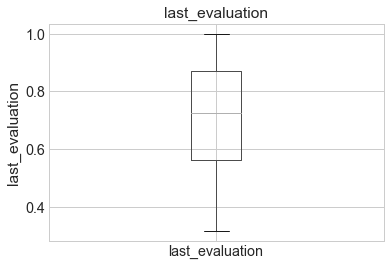

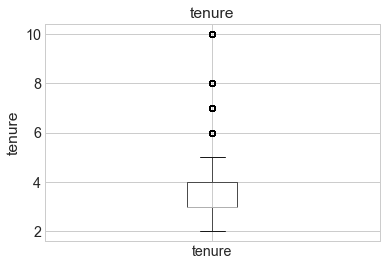

In [20]:
check_outlier(df_emp_master,'last_evaluation')
check_outlier(df_emp_master,'tenure')


<AxesSubplot:ylabel='employee_id'>

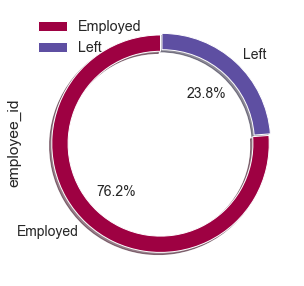

In [21]:
#df_emp_master.plot(kind='pie',column='status')
space = np.ones(2)/100
PlotData =(df_emp_master.groupby('status').count()).employee_id

PlotData.plot(kind='pie', explode=space,  fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                     shadow=True, startangle=90, figsize=(5,5), cmap='Spectral', legend=True)


<AxesSubplot:xlabel='tenure', ylabel='count'>

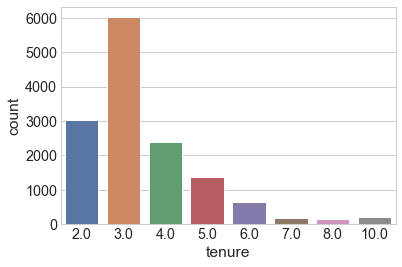

In [22]:
#space = np.ones(2)/100
#PlotData =(df_emp_master.groupby('tenure').count())
#PlotData.plot(kind="bar",y='employee_id')
sns.countplot(data=df_emp_master, x='tenure')

<AxesSubplot:xlabel='tenure', ylabel='count'>

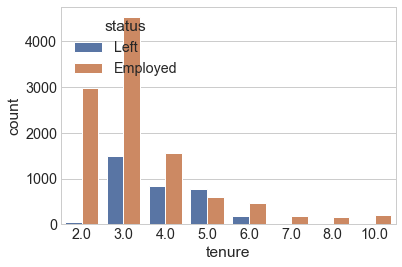

In [23]:
sns.countplot(data=df_emp_master, x='tenure',  hue='status')

## Data Cleanup

### 1. 206 Departments are -IT which is not a valid Dept ID. 

In [24]:
df_emp_master =df_emp_master.replace({'-IT': 'D00-IT',})

### 2. Classifying 707 departments with NULL values as Others

In [25]:


df_new={'dept_id': 'D00-OTH'  , 'dept_name': 'Others', 'dept_head':'Other'}
df_department=df_department.append(df_new,ignore_index=True)

In [26]:
df_emp_master['department'] = np.where(df_emp_master['department'].isnull(),  'D00-OTH', df_emp_master['department'])

### 3. Replacing 12104 Null values in Filed_complaint

In [27]:
df_emp_master['filed_complaint'] = np.where(df_emp_master['filed_complaint'].isnull(),  '0', df_emp_master['filed_complaint'])

### 4. Correcting 13853 records with "recently_promoted" as NULL by replacing it with zero

In [28]:
df_emp_master['recently_promoted'] = np.where(df_emp_master['recently_promoted'].isnull(),  '0', df_emp_master['recently_promoted'])

### 5. Imputing tenure with median for 150 records which have NULL values

In [29]:
df_emp_master['tenure'] = df_emp_master['tenure'].replace({np.nan: getattr(df_emp_master['tenure'], 'median')(),})

### 6. Imputing tenure with median for 150 records which have NULL values

In [30]:
df_emp_master['satisfaction'] = df_emp_master['satisfaction'].replace({np.nan: getattr(df_emp_master['satisfaction'], 'mean')(),})

### 7. Data imputation for 1,487 NULL records in last_evaluation

In [31]:
# Indicator variable for last evaluation

df_emp_master['last_evaluation_missing']= df_emp_master.last_evaluation.isnull().astype(int)
df_emp_master['last_evaluation_missing'].unique()


# Missing values

df_emp_master.last_evaluation.fillna(0, inplace=True)

### 8. Deleting 2 records with emp id =0

In [32]:
df_emp_master=df_emp_master.loc[(df_emp_master['employee_id']!=0) & (df_emp_master['department']!=None)]

In [33]:
df_emp_master.shape

(14145, 12)

# Merging Datasets

Merge df_emp_master, df_emp_details, df_department

In [34]:
df_department=df_department.rename(columns={'dept_id':'department'})

In [35]:
df_department.columns

Index(['department', 'dept_name', 'dept_head'], dtype='object')

In [36]:
df_final = df_emp_master.merge(df_emp_det,on='employee_id', how='left')

In [37]:
df_final.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
14140,245.0,D00-SS,0,0.850785,6,0,medium,0.225084,Employed,5.0,101809,0,45,Female,Married
14141,192.0,D00-SS,0,0.951901,3,0,medium,0.539834,Employed,3.0,116153,0,22,Female,Unmarried
14142,175.0,D00-MN,0,0.854538,4,0,medium,0.934465,Employed,3.0,119780,0,25,Male,Unmarried
14143,268.0,D00-MT,0,0.900887,5,0,medium,0.906613,Left,5.0,115325,0,50,Male,Married
14144,268.0,D00-IT,1.0,0.897098,2,0,low,0.459371,Employed,4.0,112312,0,24,Male,Unmarried


In [38]:
# df_final.to_csv('D:\\DSINSAID\\MERGE_DATA.csv', header=True, index=False, encoding='utf-8')

In [39]:
df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried


In [40]:
df_final.info()
df_department.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_monthly_hrs          14145 non-null  float64
 1   department               14145 non-null  object 
 2   filed_complaint          14145 non-null  object 
 3   last_evaluation          14145 non-null  float64
 4   n_projects               14145 non-null  int64  
 5   recently_promoted        14145 non-null  object 
 6   salary                   14145 non-null  object 
 7   satisfaction             14145 non-null  float64
 8   status                   14145 non-null  object 
 9   tenure                   14145 non-null  float64
 10  employee_id              14145 non-null  int64  
 11  last_evaluation_missing  14145 non-null  int64  
 12  age                      14145 non-null  int64  
 13  gender                   14145 non-null  object 
 14  marital_status        

In [41]:
df_department.drop_duplicates()

,department,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [42]:
df_emp_master.drop_duplicates()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14116,141.0,D00-SS,0,0.537866,3,0,low,0.610841,Employed,3.0,100833,0
14117,168.0,D00-SS,0,0.643553,3,0,low,0.489559,Employed,3.0,118090,0
14118,257.0,D00-SP,0,0.000000,3,0,medium,0.944942,Employed,3.0,106064,1
14119,242.0,D00-IT,0,0.836603,4,0,low,0.740136,Employed,2.0,113083,0


In [43]:
df_final.drop_duplicates()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,141.0,D00-SS,0,0.537866,3,0,low,0.610841,Employed,3.0,100833,0,29,Male,Unmarried
14112,168.0,D00-SS,0,0.643553,3,0,low,0.489559,Employed,3.0,118090,0,24,Female,Unmarried
14113,257.0,D00-SP,0,0.000000,3,0,medium,0.944942,Employed,3.0,106064,1,27,Male,Unmarried
14114,242.0,D00-IT,0,0.836603,4,0,low,0.740136,Employed,2.0,113083,0,46,Male,Married


In [44]:
df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried


In [45]:
df_department.columns = df_department.columns.str.strip()
df_final.columns=df_final.columns.str.strip()

In [46]:
df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried


In [47]:
df_final=df_final.merge(df_department, on='department', how='left')

In [48]:
df_department.columns



Index(['department', 'dept_name', 'dept_head'], dtype='object')

In [49]:
df_final.shape

(14145, 17)

In [50]:
df_final.drop_duplicates()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status,dept_name,dept_head
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married,Others,Other
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried,Others,Other
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried,Sales,Edward J Bayley
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married,Support,Amelia Westray
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried,Sales,Edward J Bayley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,141.0,D00-SS,0,0.537866,3,0,low,0.610841,Employed,3.0,100833,0,29,Male,Unmarried,Sales,Edward J Bayley
14112,168.0,D00-SS,0,0.643553,3,0,low,0.489559,Employed,3.0,118090,0,24,Female,Unmarried,Sales,Edward J Bayley
14113,257.0,D00-SP,0,0.000000,3,0,medium,0.944942,Employed,3.0,106064,1,27,Male,Unmarried,Support,Amelia Westray
14114,242.0,D00-IT,0,0.836603,4,0,low,0.740136,Employed,2.0,113083,0,46,Male,Married,IT,Henry Adey


In [51]:
df_final.shape

(14145, 17)

**Observations**
- Final table has '14145' records



In [52]:
analyze_df(df_final)

(14145, 17)
----------------------------------------Shape--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_monthly_hrs          14145 non-null  float64
 1   department               14145 non-null  object 
 2   filed_complaint          14145 non-null  object 
 3   last_evaluation          14145 non-null  float64
 4   n_projects               14145 non-null  int64  
 5   recently_promoted        14145 non-null  object 
 6   salary                   14145 non-null  object 
 7   satisfaction             14145 non-null  float64
 8   status                   14145 non-null  object 
 9   tenure                   14145 non-null  float64
 10  employee_id              14145 non-null  int64  
 11  last_evaluation_missing  14145 non-null  int64  
 12  age                   

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status,dept_name,dept_head
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married,Others,Other
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried,Others,Other
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried,Sales,Edward J Bayley
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married,Support,Amelia Westray
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried,Sales,Edward J Bayley


In [53]:
df_final['last_evaluation_missing'].value_counts()

0    12658
1    1487 
Name: last_evaluation_missing, dtype: int64

<a id ="eda"></a>
## Exploratory Data Analysis

### 1. Total Employee count

In [54]:

print(df_final.employee_id.nunique())

14116


<b> Obs1: There are 14116 unique employee id </b>

In [55]:
df_final.status.value_counts()

Employed    10782
Left        3363 
Name: status, dtype: int64

<b> Obs2: Dataset has 10782 records of existing employees and 3363 records of employees who have left the organization </b>

<AxesSubplot:ylabel='employee_id'>

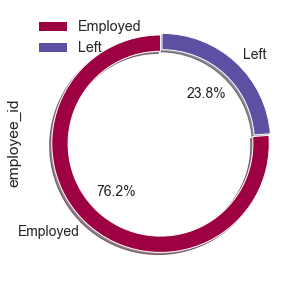

In [56]:
#df_emp_master.plot(kind='pie',column='status')
space = np.ones(2)/100
PlotData =(df_final.groupby('status').count()).employee_id

PlotData.plot(kind='pie', explode=space,  fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                     shadow=True, startangle=90, figsize=(5,5), cmap='Spectral', legend=True)


<b> Obs2: Dataset has 10782 records of existing employees (76.2%)  and 3363 records of employees who have left the organization (23.8%)  </b>

<AxesSubplot:xlabel='tenure', ylabel='count'>

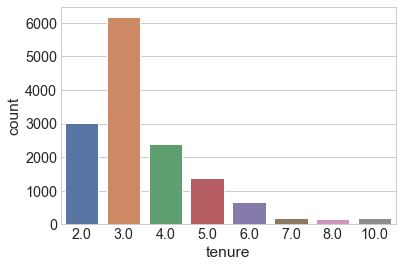

In [57]:
#space = np.ones(2)/100
#PlotData =(df_emp_master.groupby('tenure').count())
#PlotData.plot(kind="bar",y='employee_id')
sns.countplot(data=df_final, x='tenure')

<b> Obs3: Organization has more employees with tenure of 2 to 4 yrs.  </b>

<AxesSubplot:xlabel='tenure', ylabel='count'>

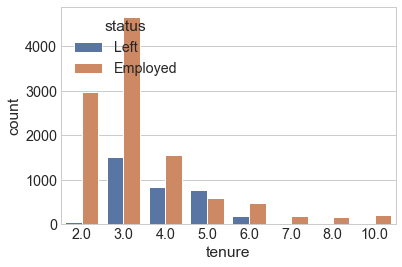

In [58]:
sns.countplot(data=df_final, x='tenure', hue='status')

In [59]:
def ShowHBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width}', (x + width*1.02, y + height/2), va='center')

def ShowHBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width/total:.0%}', (x + width*1.02, y + height/2), va='center')
        
def ShowVBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

def ShowVBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/total:.0%}', (x + width/2, (y + height*1.02) ), ha='center')

In [60]:
df_final=df_final.drop_duplicates(subset=["employee_id"],keep='first')
df_final.shape

(14116, 17)

In [61]:
df_final_left=df_final[df_final.status=='Left']
df_final_left.shape

(3355, 17)

<a id="states"></a>
### Visualization/ Plots for  across states

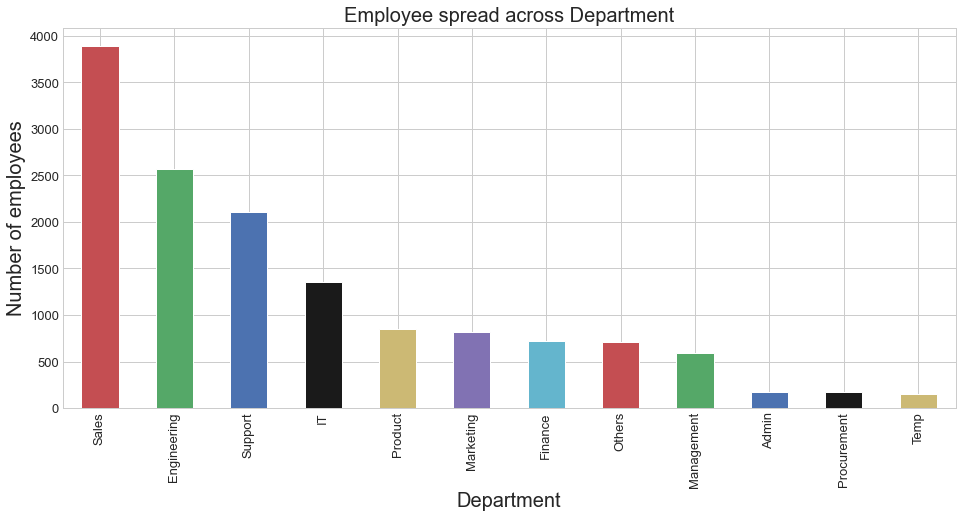

In [62]:
PlotData = (df_final.groupby(['dept_name','employee_id']).employee_id.count()).groupby('dept_name').count().nlargest(20)
ax = PlotData.plot.bar(figsize=(16,7), color= list('rgbkymc') ,  fontsize=13)
plt.xlabel('Department',fontsize=20)
plt.ylabel('Number of employees',fontsize=20)
plt.title('Employee spread across Department',fontsize=20)
#ShowVBarValue()
#ShowVBarPer()
plt.savefig('Department wise employee.png', bbox_inches='tight')

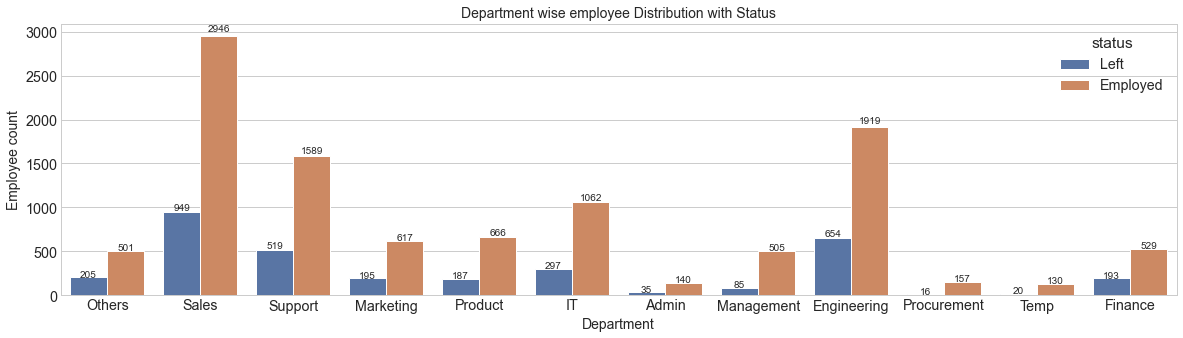

In [63]:
#ax = PlotData.plot.bar(figsize=(16,7), color= list('rgbkymc') ,  fontsize=13)

PlotData = df_final
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
ax=sns.countplot(data=df_final, x='dept_name',  hue='status', ax=axis1)
plt.title("Department wise employee Distribution with Status",fontsize=14)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Employee count',fontsize=14)
ShowVBarValue()
plt.savefig('Figure\BrandGenderwise.png', bbox_inches='tight')


### Attritation rate by department

In [64]:
departments = df_final['dept_name'].unique()
departments

array(['Others', 'Sales', 'Support', 'Marketing', 'Product', 'IT',
       'Admin', 'Management', 'Engineering', 'Procurement', 'Temp',
       'Finance'], dtype=object)

In [65]:

employee_count_by_department = np.zeros(len(departments))
dept_attrition = np.zeros(len(departments))
overall_attrition = np.zeros(len(departments))
i = 0
for dept in departments:
    employee_count_by_department[i]=format(df_final[df_final['dept_name']==dept].dept_name.count()/df_final['dept_name'].count() * 100,  ".2f")
    dept_attrition[i] = format(df_final[(df_final['dept_name'] == dept) & (df_final['status'] == "Left")].dept_name.count()/df_final[(df_final['dept_name'] == dept)].dept_name.count() * 100, ".2f")
    overall_attrition[i] = format(df_final[(df_final['dept_name'] == dept) & (df_final['status'] == "Left")]['dept_name'].count()/df_final[(df_final['status'] == "Left")].dept_name.count() * 100, ".2f")
    i += 1

attrition_df = pd.DataFrame({'Employee_Percentage': employee_count_by_department, 'Dept_attrition': dept_attrition, 'Overall_attrition': overall_attrition}, index=departments)
attrition_df



,Employee_Percentage,Dept_attrition,Overall_attrition
Others,5.00,29.04,6.11
Sales,27.59,24.36,28.29
Support,14.93,24.62,15.47
Marketing,5.75,24.01,5.81
Product,6.04,21.92,5.57
IT,9.63,21.85,8.85
Admin,1.24,20.00,1.04
Management,4.18,14.41,2.53
Engineering,18.23,25.42,19.49
Procurement,1.23,9.25,0.48


<b> Obs4: Most the departments have department attrition of over 20% led by Finance team with 26% and Engineering team with 25%. Sales team contributes to 28.29% of overall attrition. Procurement team has the least attrition rate </b>

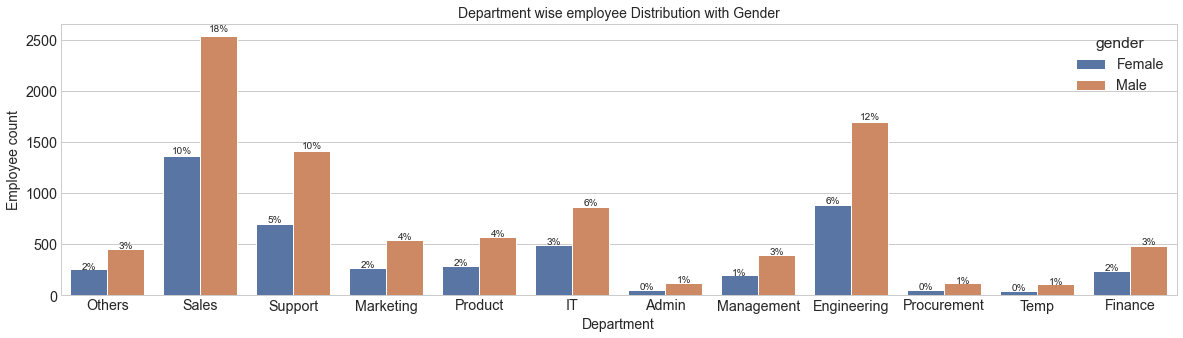

In [66]:
#ax = PlotData.plot.bar(figsize=(16,7), color= list('rgbkymc') ,  fontsize=13)

PlotData = df_final
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
#ax = sns.countplot(x='phone_brand', hue="gender",order=PlotData.phone_brand.value_counts().iloc[:10].index, data=PlotData, ax=axis1)
ax=sns.countplot(data=df_final, x='dept_name',  hue='gender', ax=axis1)
plt.title("Department wise employee Distribution with Gender",fontsize=14)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Employee count',fontsize=14)
ShowVBarPer()
plt.savefig('Figure\BrandGenderwise.png', bbox_inches='tight')


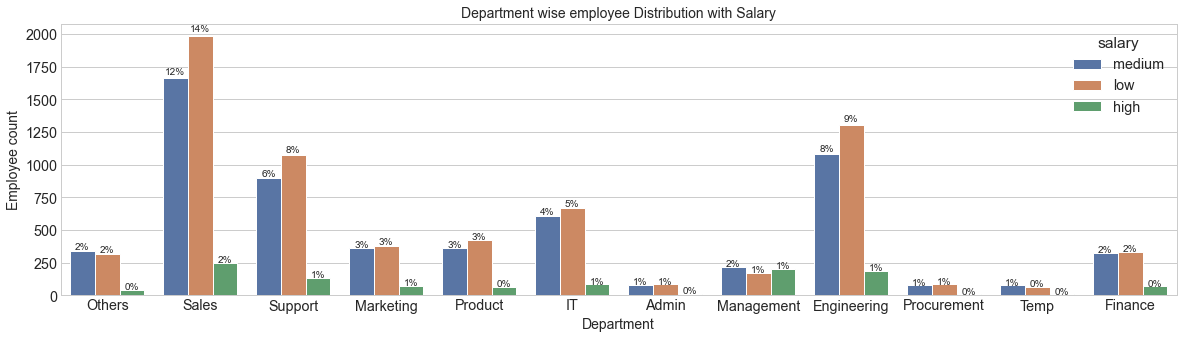

In [67]:
#ax = PlotData.plot.bar(figsize=(16,7), color= list('rgbkymc') ,  fontsize=13)

PlotData = df_final
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
#ax = sns.countplot(x='phone_brand', hue="gender",order=PlotData.phone_brand.value_counts().iloc[:10].index, data=PlotData, ax=axis1)
ax=sns.countplot(data=df_final, x='dept_name',  hue='salary', ax=axis1)
plt.title("Department wise employee Distribution with Salary",fontsize=14)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Employee count',fontsize=14)
ShowVBarPer()
plt.savefig('Figure\BrandGenderwise.png', bbox_inches='tight')


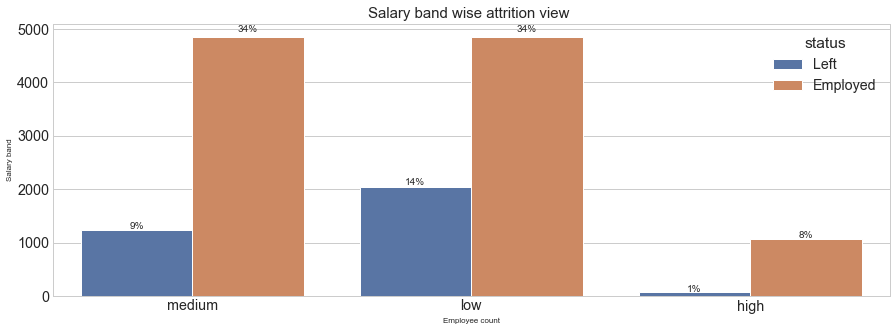

In [68]:
PlotData = df_final
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
ax = sns.countplot(x='salary', hue="status", data=PlotData, ax=axis1)
plt.title("Salary band wise attrition view ",fontsize=15)
plt.xlabel('Employee count',fontsize=8)
plt.ylabel('Salary band',fontsize=8)
ShowVBarPer()

<b> Obs5: Attrition rate with high salary is low, whereas people with low salaries are quitting the organization </b>

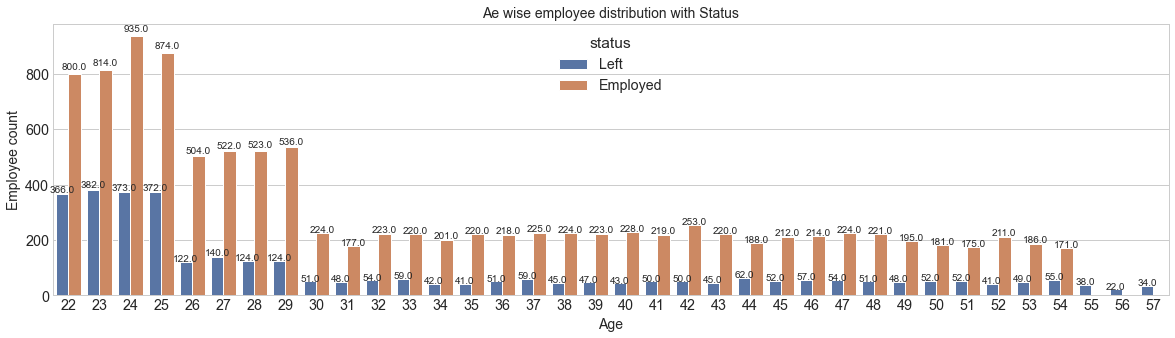

In [69]:
PlotData=df_final
fig, axis1=plt.subplots(1,1,figsize=(20,5))
ax=sns.countplot(data=PlotData, x='age', hue='status' ,ax=axis1)
plt.title("Ae wise employee distribution with Status",fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Employee count',fontsize=14)
ShowVBarValue()

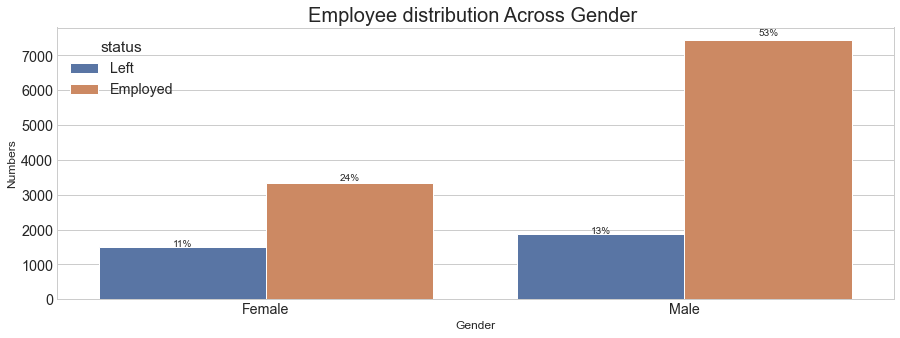

In [70]:
PlotData = df_final
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
ax = sns.countplot(x='gender', hue="status", data=PlotData, ax=axis1)
plt.title("Employee distribution Across Gender ",fontsize=20)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Numbers',fontsize=12)
ShowVBarPer()


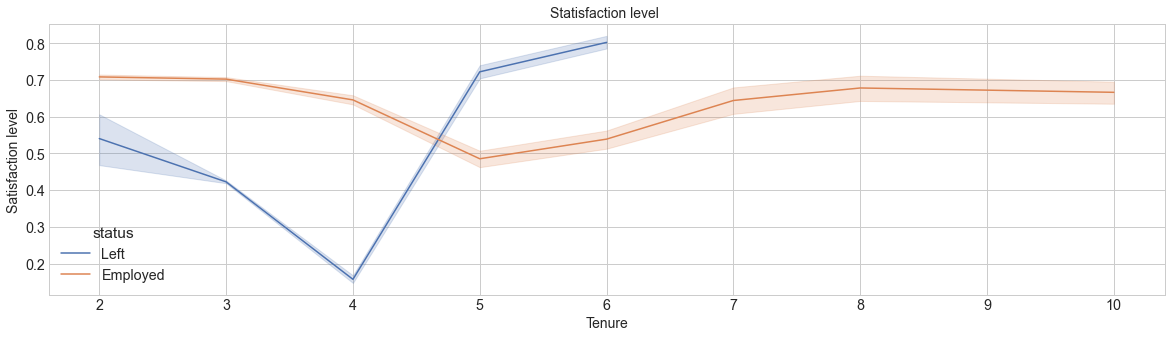

In [71]:
PlotData=df_final
fig, axis1=plt.subplots(1,1,figsize=(20,5))
ax=sns.lineplot(data=PlotData, x='tenure', y='satisfaction',hue='status' , ax=axis1)
plt.title("Statisfaction level ",fontsize=14)
plt.xlabel('Tenure',fontsize=14)
plt.ylabel('Satisfaction level',fontsize=14)
ShowVBarPer()

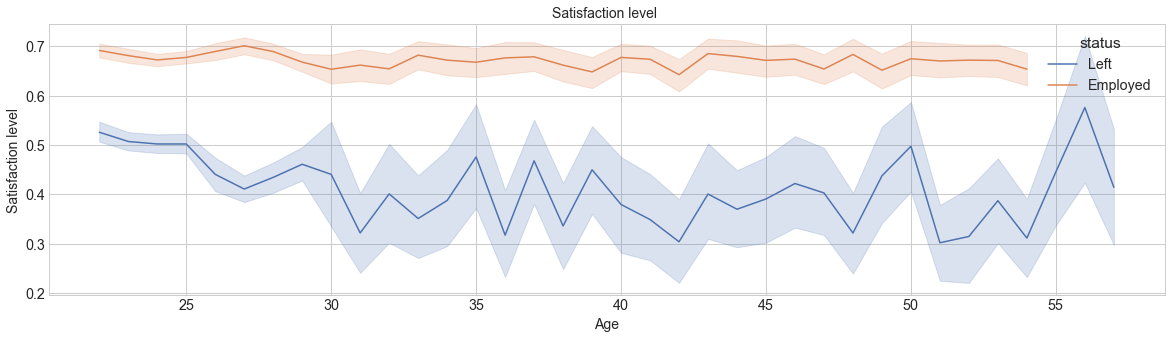

In [72]:
PlotData=df_final
fig, axis1=plt.subplots(1,1,figsize=(20,5))
ax=sns.lineplot(data=PlotData, x='age', y='satisfaction',hue='status' , ax=axis1)
plt.title("Satisfaction level ",fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Satisfaction level',fontsize=14)
ShowVBarPer()

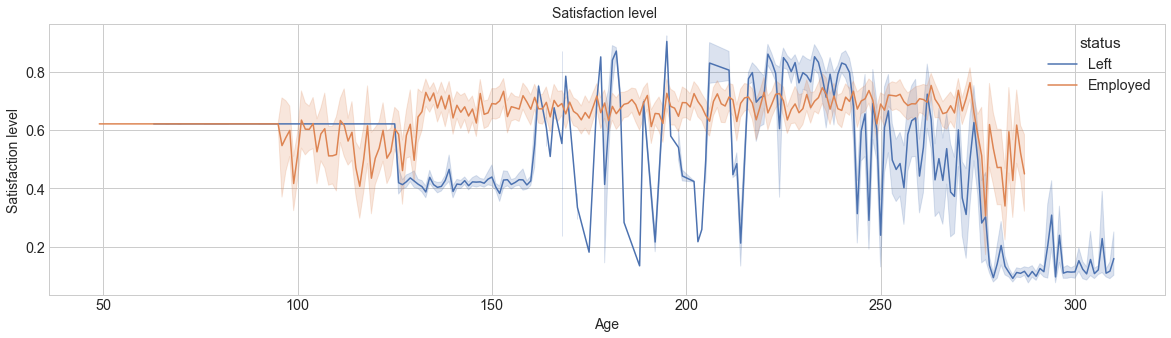

In [73]:

PlotData=df_final
fig, axis1=plt.subplots(1,1,figsize=(20,5))
ax=sns.lineplot(data=PlotData, x='avg_monthly_hrs', y='satisfaction',hue='status' , ax=axis1)
plt.title("Satisfaction level ",fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Satisfaction level',fontsize=14)
ShowVBarPer()

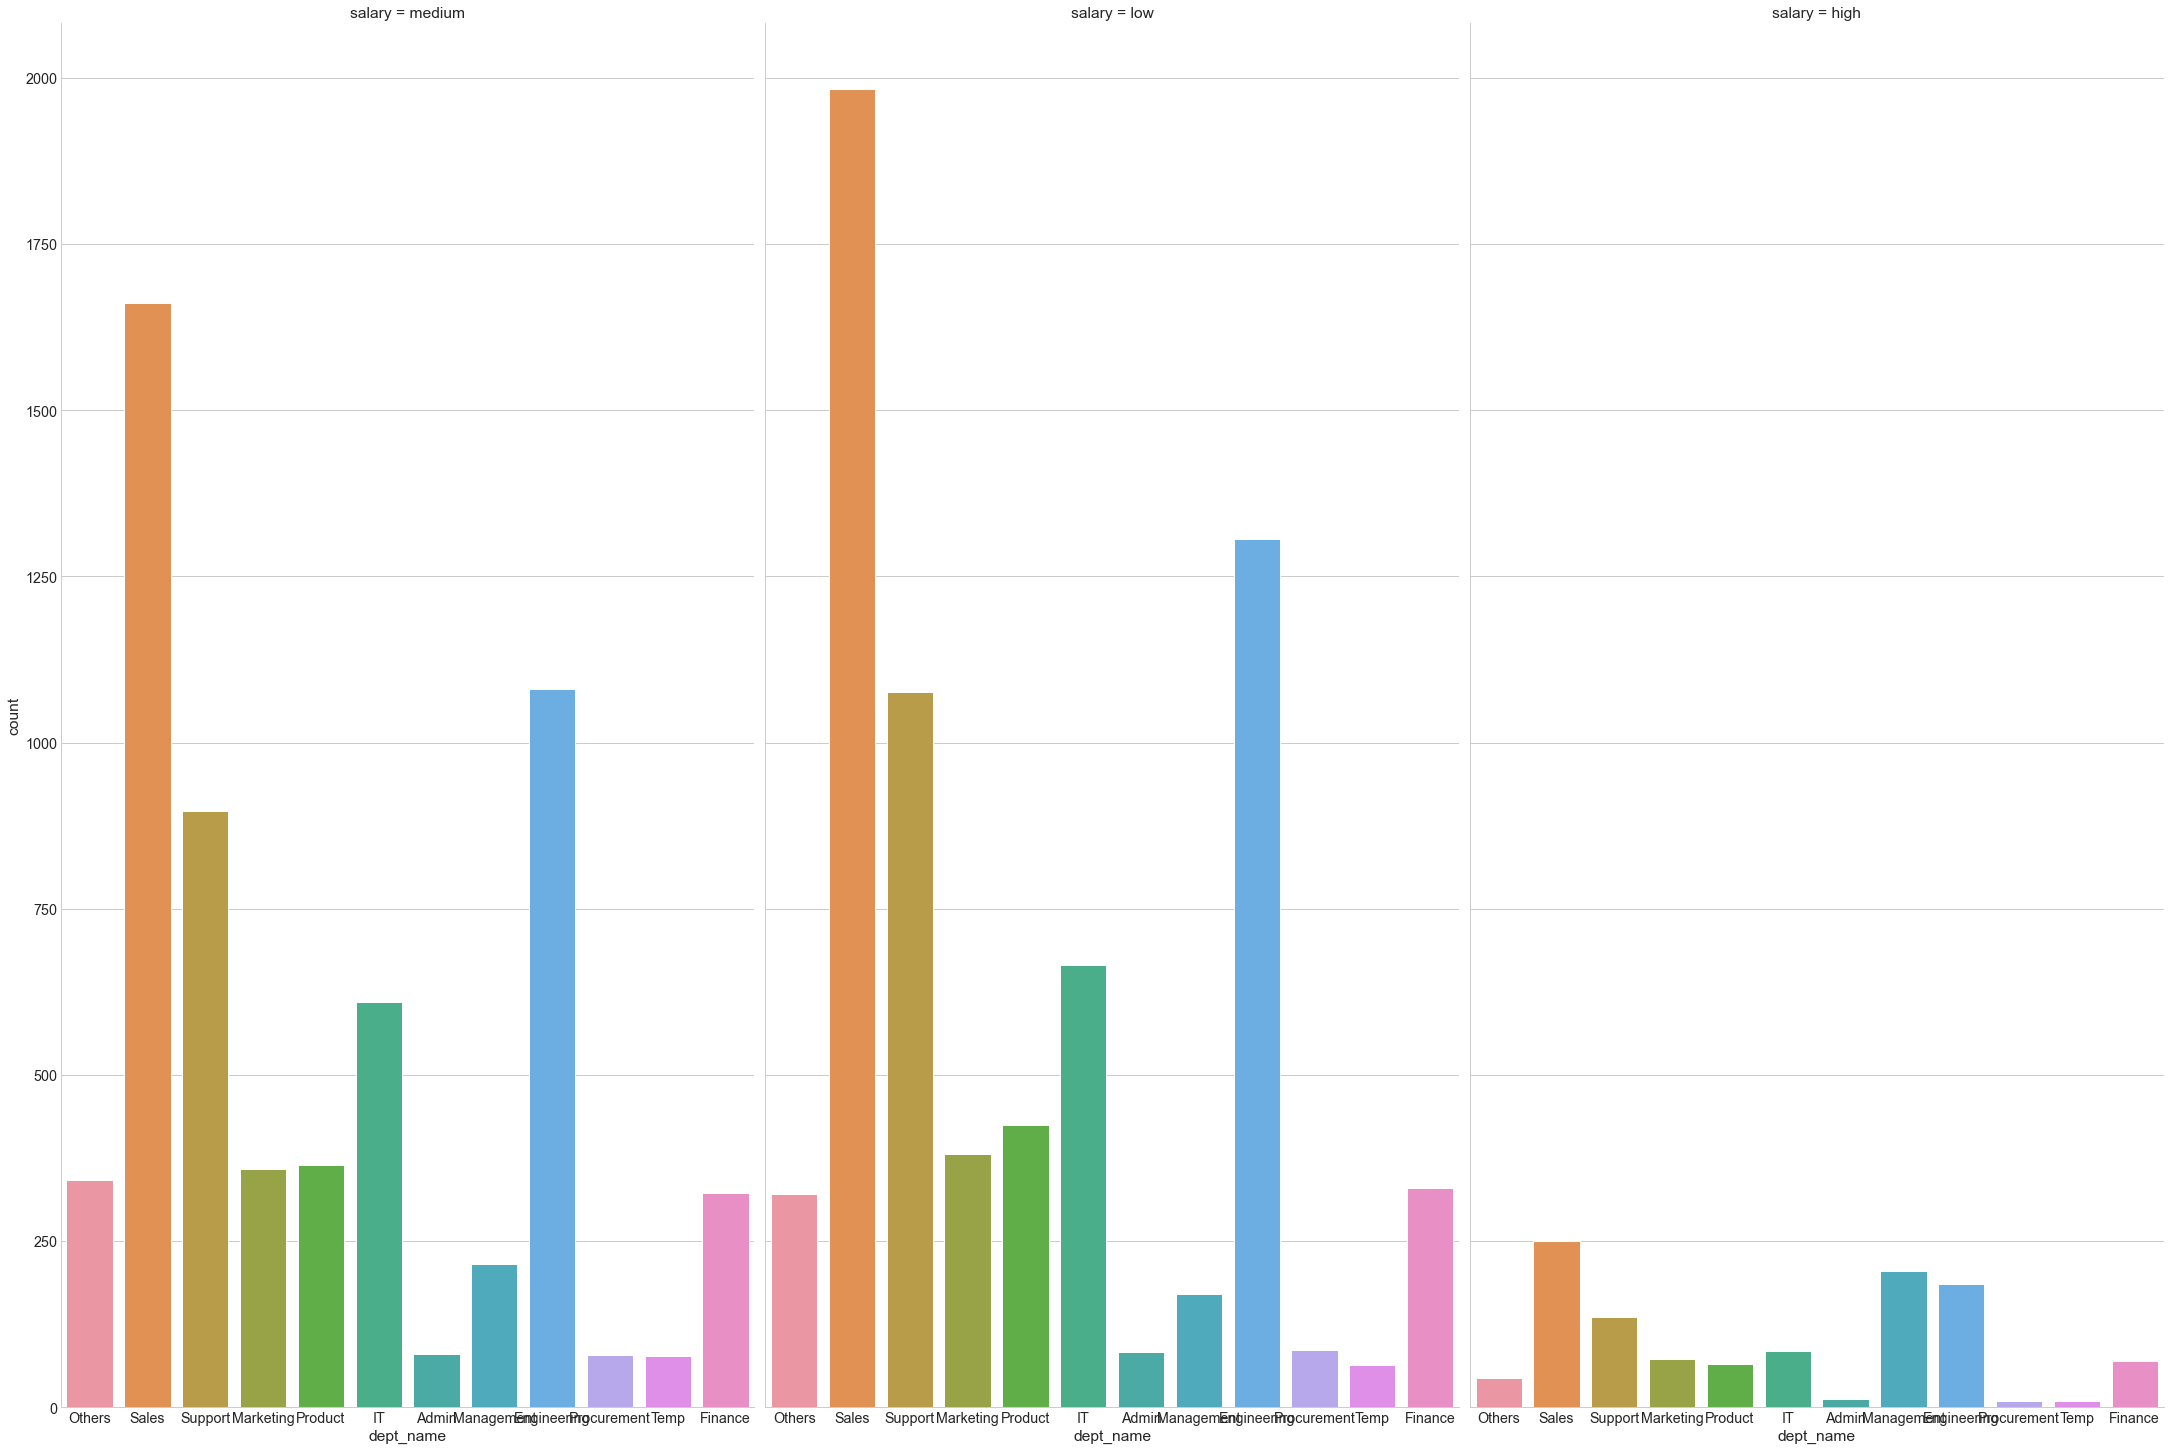

In [74]:
sns.catplot(x="dept_name",data=df_final,col="salary",kind="count",aspect=0.5,height=20)

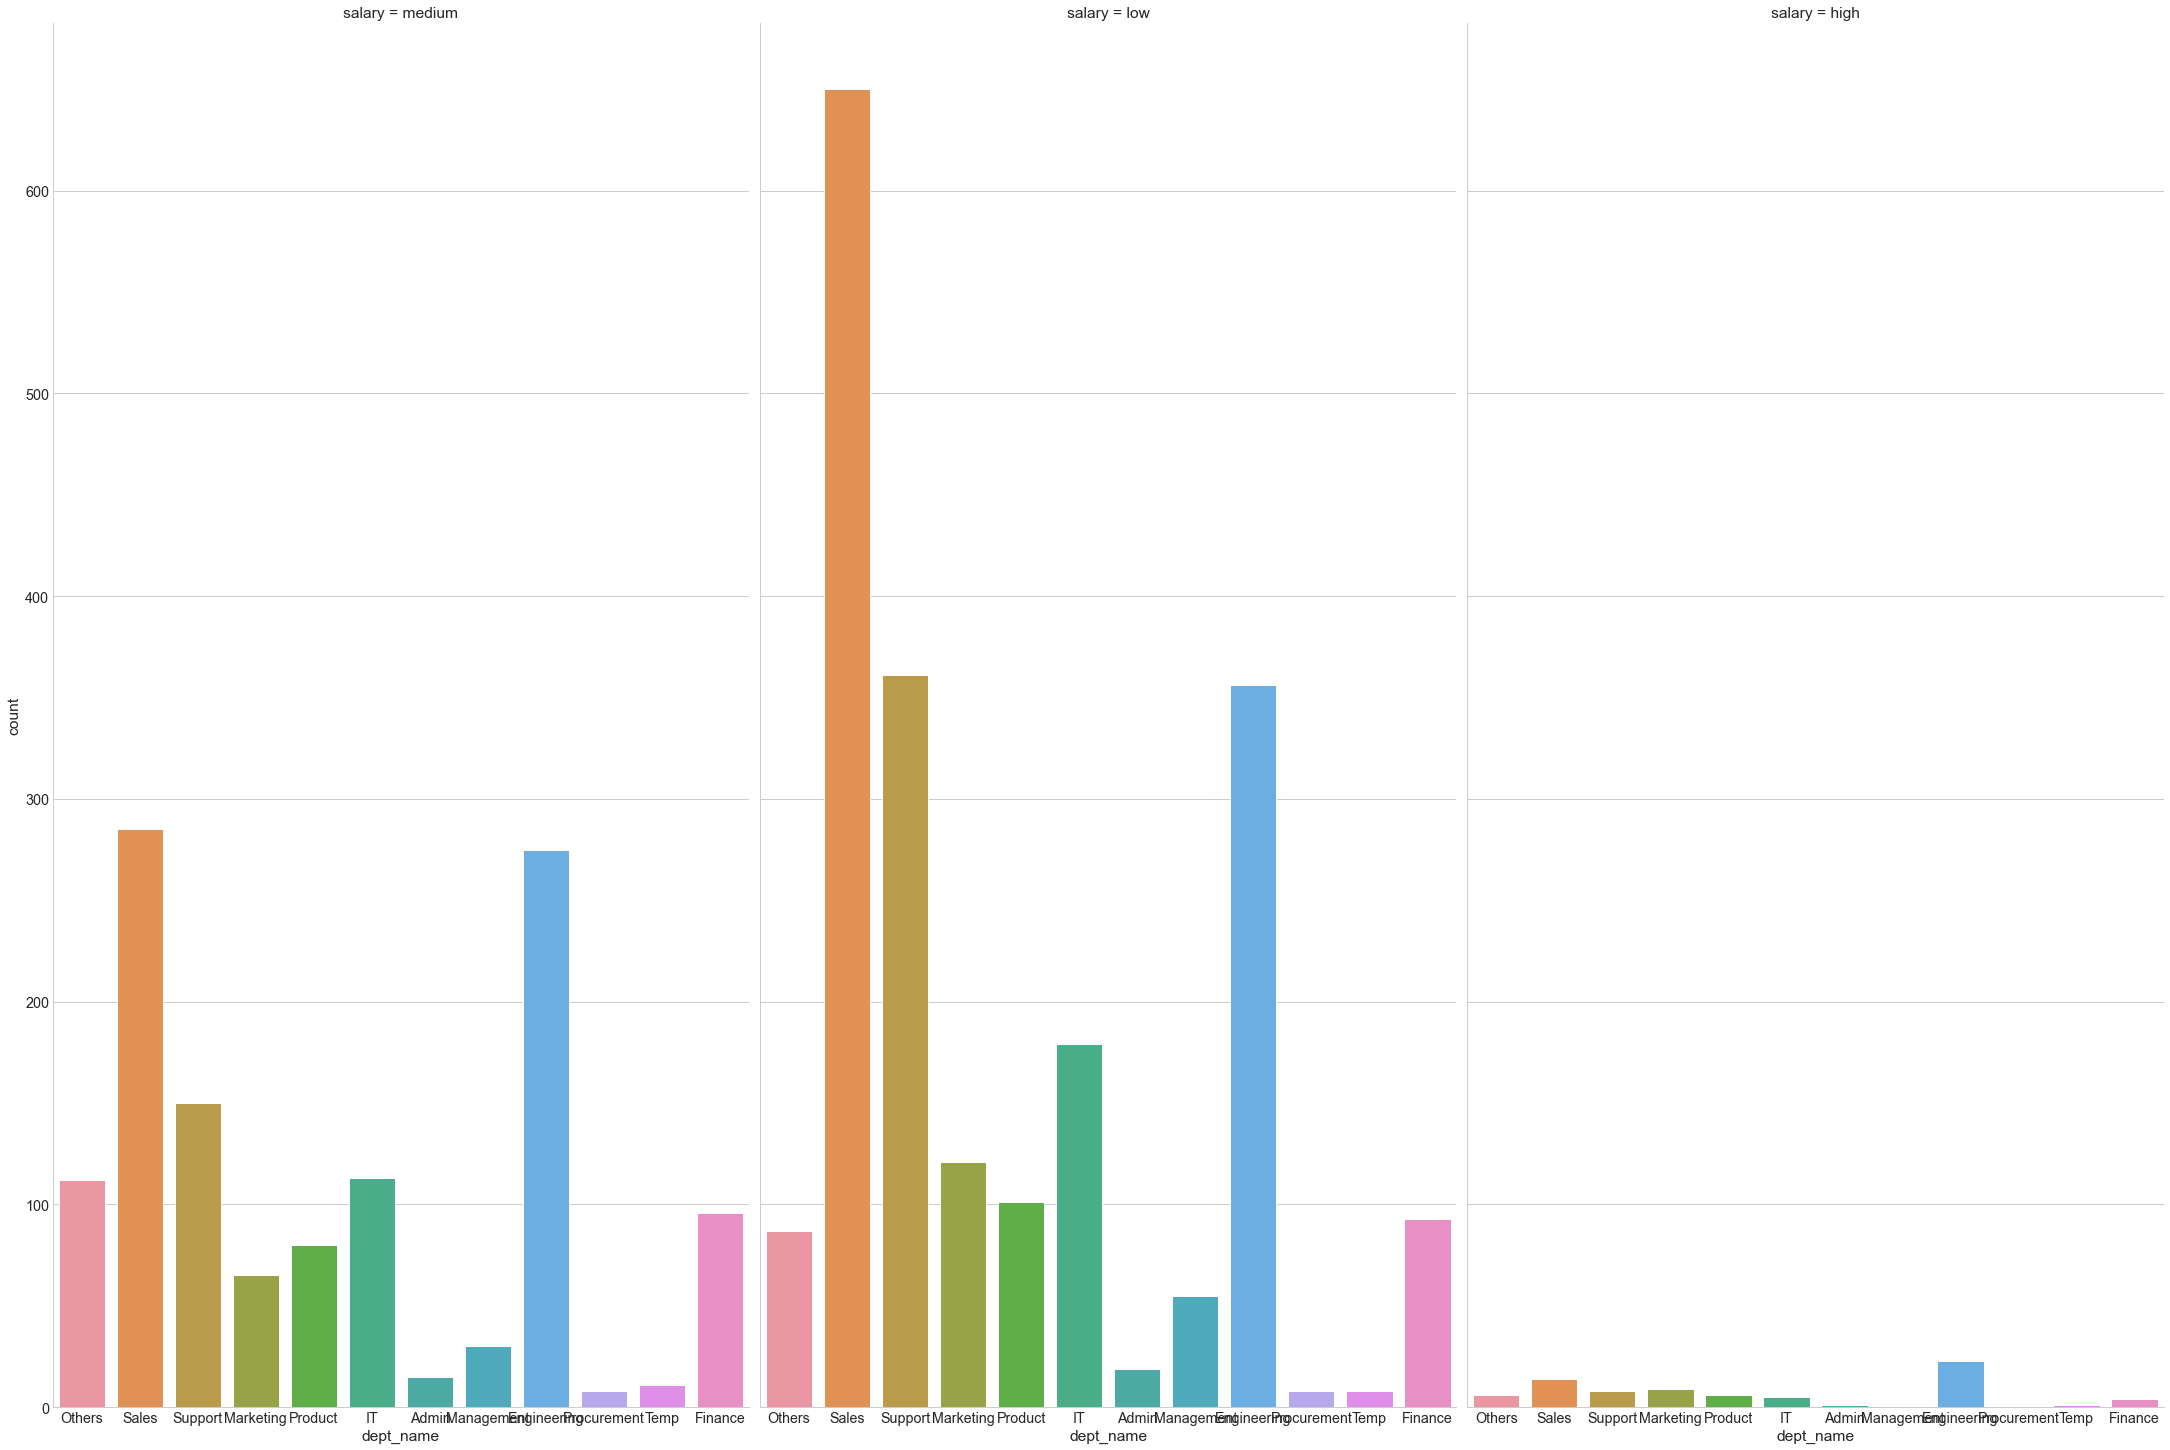

In [75]:
sns.catplot(x="dept_name",data=df_final_left,col="salary",kind="count",aspect=0.5,height=20)

<b> Obs : Both the above category plots show that employees with higher salary tend to stay with the organization viz-a-viz employees with low salary</b>

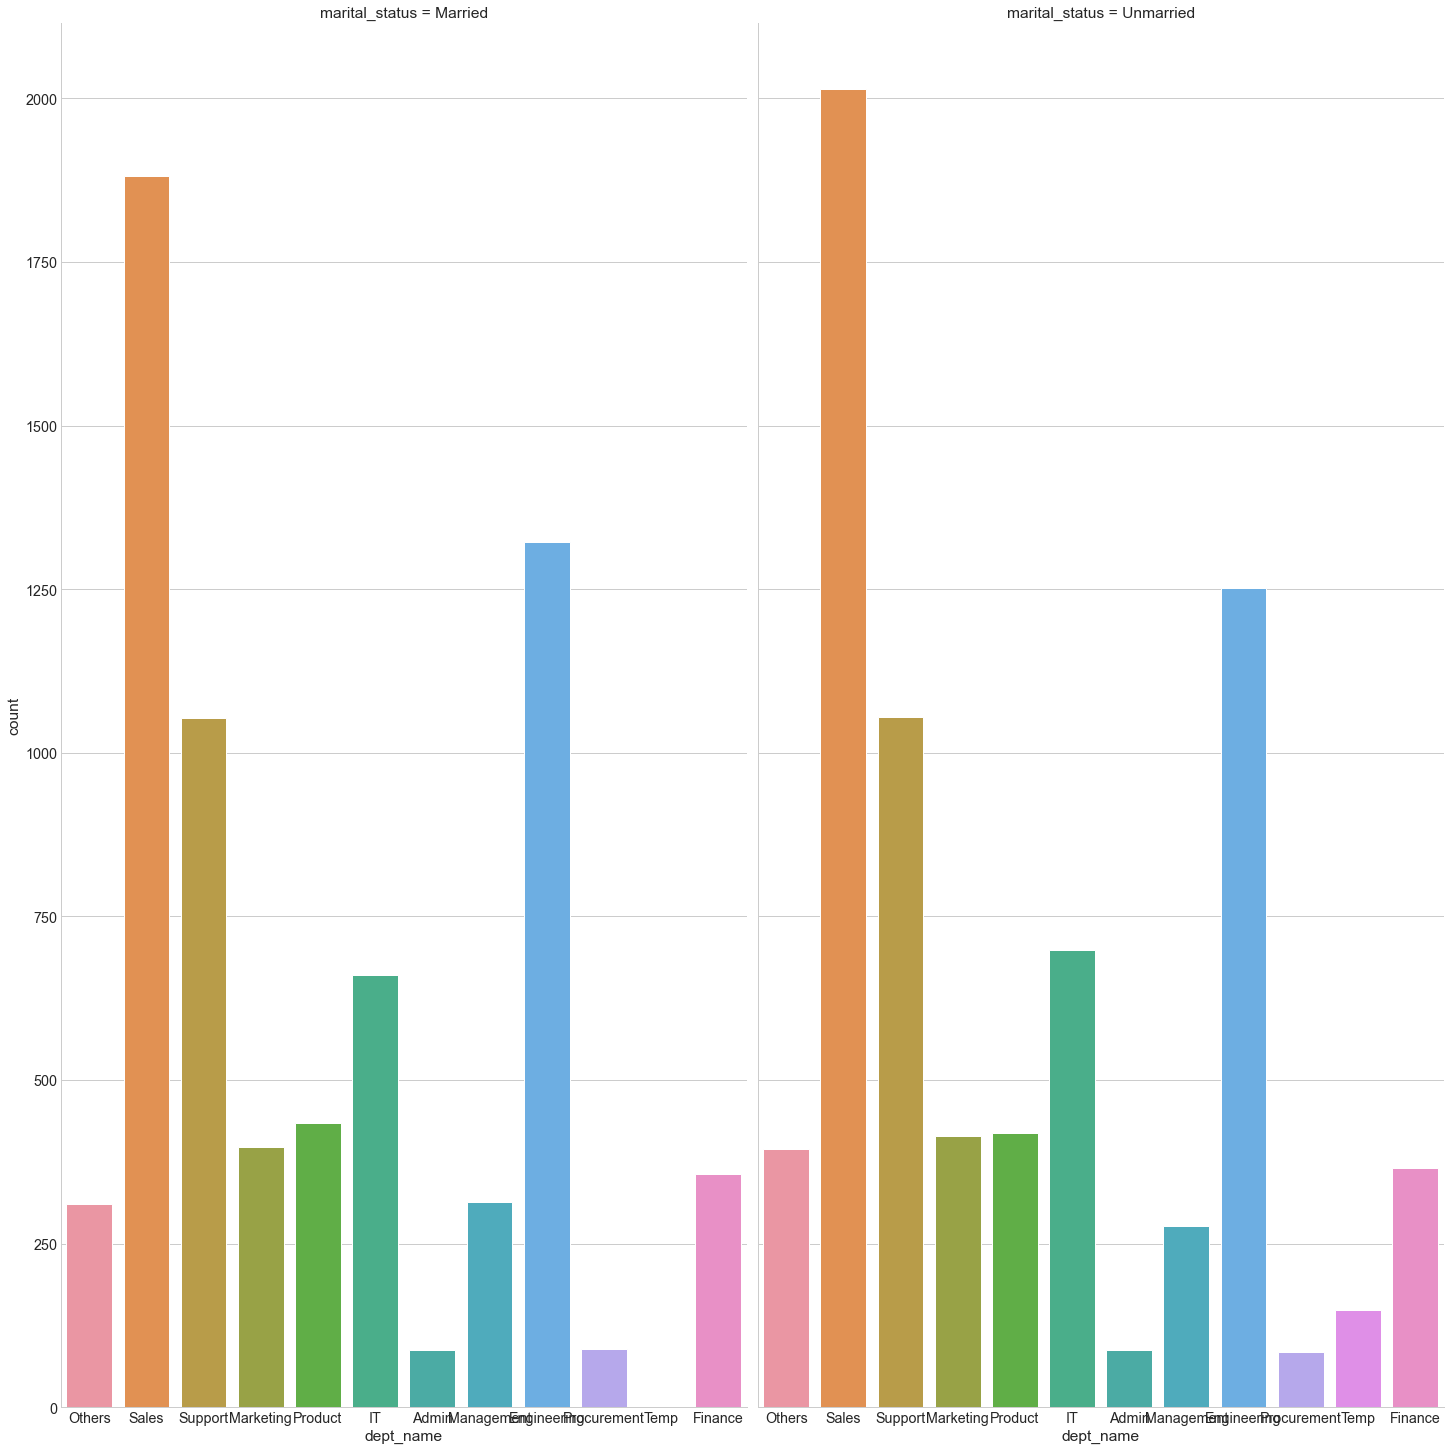

In [76]:
sns.catplot(x="dept_name",data=df_final,col="marital_status",kind="count",aspect=0.5,height=20)

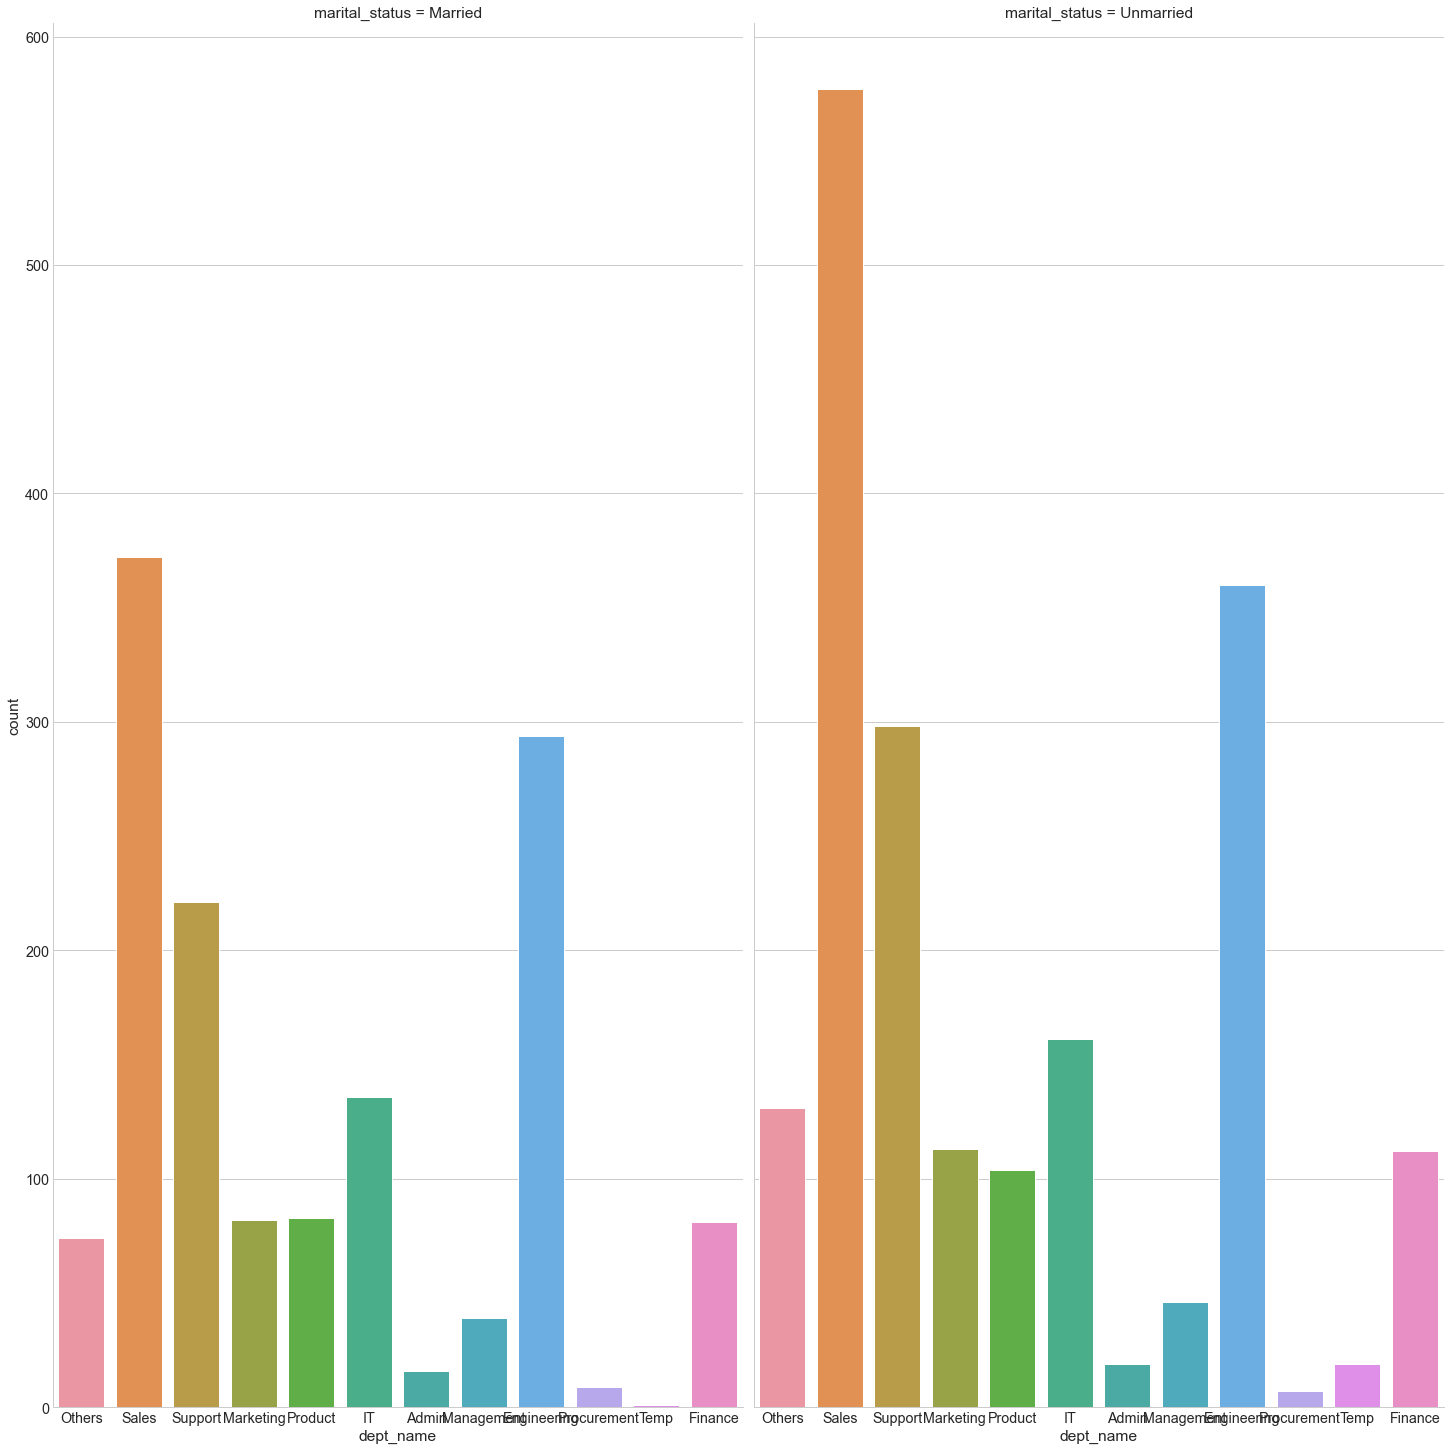

In [77]:
sns.catplot(x="dept_name",data=df_final_left,col="marital_status",kind="count",aspect=0.5,height=20)

<AxesSubplot:xlabel='dept_name', ylabel='avg_monthly_hrs'>

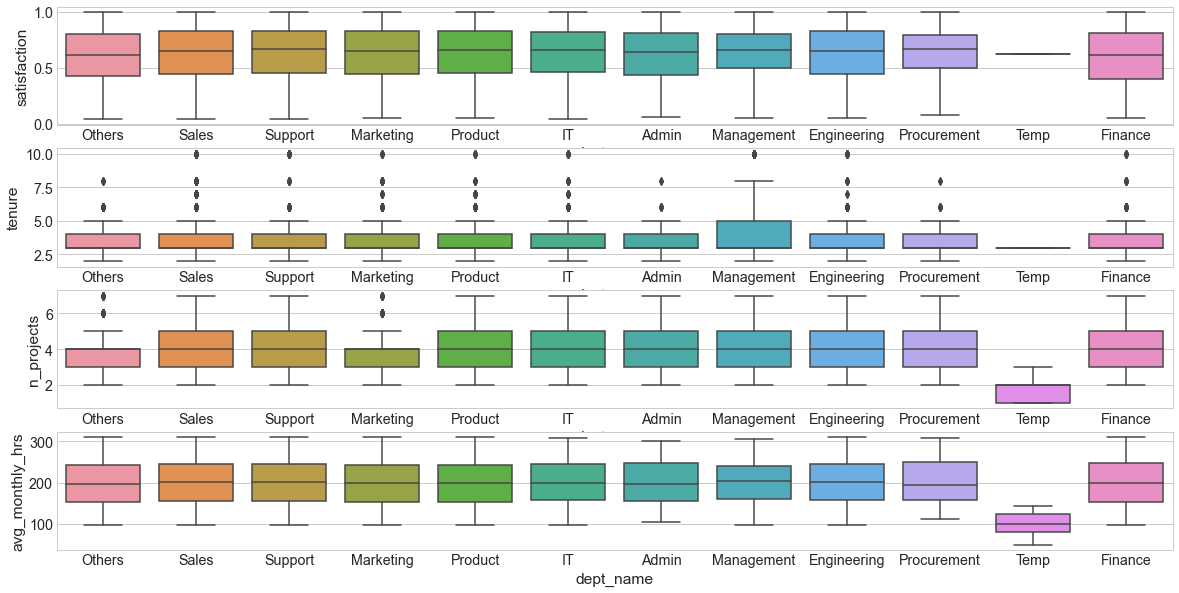

In [78]:

# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.boxplot(x="dept_name",y="satisfaction",data=df_final,ax=ax1)
sns.boxplot(x="dept_name",y="tenure",data=df_final,ax=ax2)
sns.boxplot(x="dept_name",y="n_projects",data=df_final,ax=ax3)
sns.boxplot(x="dept_name",y="avg_monthly_hrs",data=df_final,ax=ax4)

<AxesSubplot:xlabel='dept_name', ylabel='avg_monthly_hrs'>

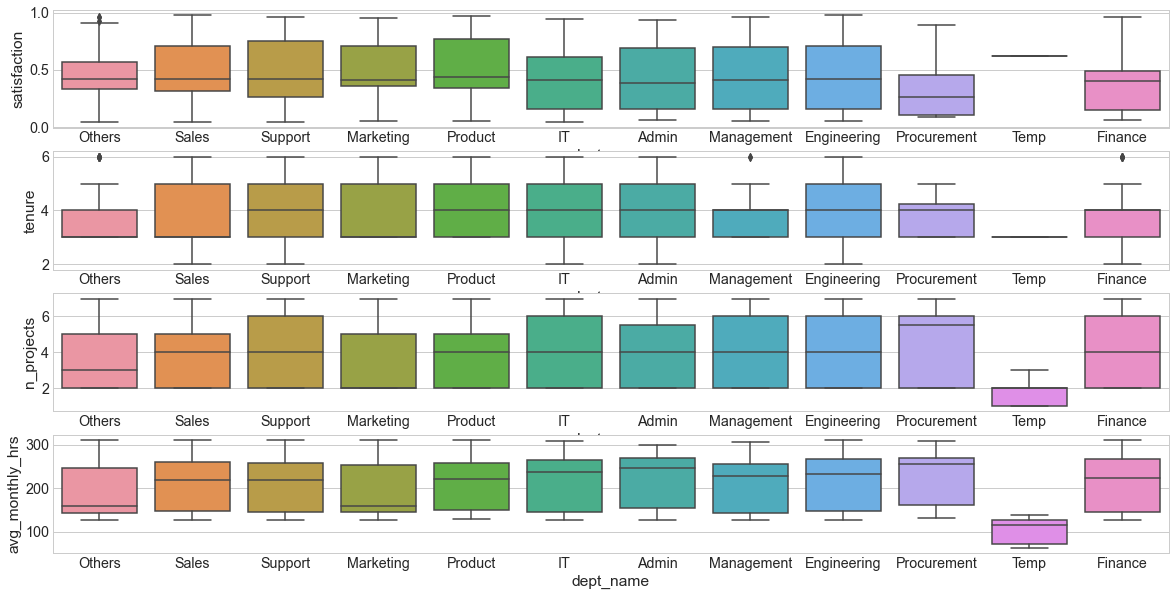

In [79]:

# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.boxplot(x="dept_name",y="satisfaction",data=df_final_left,ax=ax1)
sns.boxplot(x="dept_name",y="tenure",data=df_final_left,ax=ax2)
sns.boxplot(x="dept_name",y="n_projects",data=df_final_left,ax=ax3)
sns.boxplot(x="dept_name",y="avg_monthly_hrs",data=df_final_left,ax=ax4)

<b> Obs: High Department attrition of about 26% in Finance department could be because of high no. of project and avg_monthly salary resulting in low satisfaciton level <b>

### Feature  Engineering

<b>Dept_name and dept_head are not required for building models, hence will drop them from df_final</b>

In [80]:
df_final_org=df_final.copy()

In [81]:
df_final.drop('dept_name',axis=1, inplace=True)
df_final.drop('dept_head',axis=1, inplace=True)

In [82]:
df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried


In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_final['gender'] = le.fit_transform(df_final['gender'])
df_final['salary'] = le.fit_transform(df_final['salary'])
df_final['status'] = le.fit_transform(df_final['status'])
df_final['marital_status'] = le.fit_transform(df_final['marital_status'])
df_final['department'] = le.fit_transform(df_final['department'])

df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,6,0,0.866838,6,0,2,0.134415,1,4.0,124467,0,42,0,0
1,134.0,6,0,0.555718,2,0,1,0.511041,1,3.0,112210,0,23,0,1
2,156.0,10,1.0,0.474082,2,0,2,0.405101,1,3.0,126150,0,24,0,1
3,256.0,9,0,0.961360,6,0,1,0.152974,1,4.0,125346,0,51,0,0
4,146.0,10,0,0.507349,2,0,2,0.434845,1,3.0,113707,0,23,0,1


In [84]:


df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,6,0,0.866838,6,0,2,0.134415,1,4.0,124467,0,42,0,0
1,134.0,6,0,0.555718,2,0,1,0.511041,1,3.0,112210,0,23,0,1
2,156.0,10,1.0,0.474082,2,0,2,0.405101,1,3.0,126150,0,24,0,1
3,256.0,9,0,0.961360,6,0,1,0.152974,1,4.0,125346,0,51,0,0
4,146.0,10,0,0.507349,2,0,2,0.434845,1,3.0,113707,0,23,0,1


<AxesSubplot:>

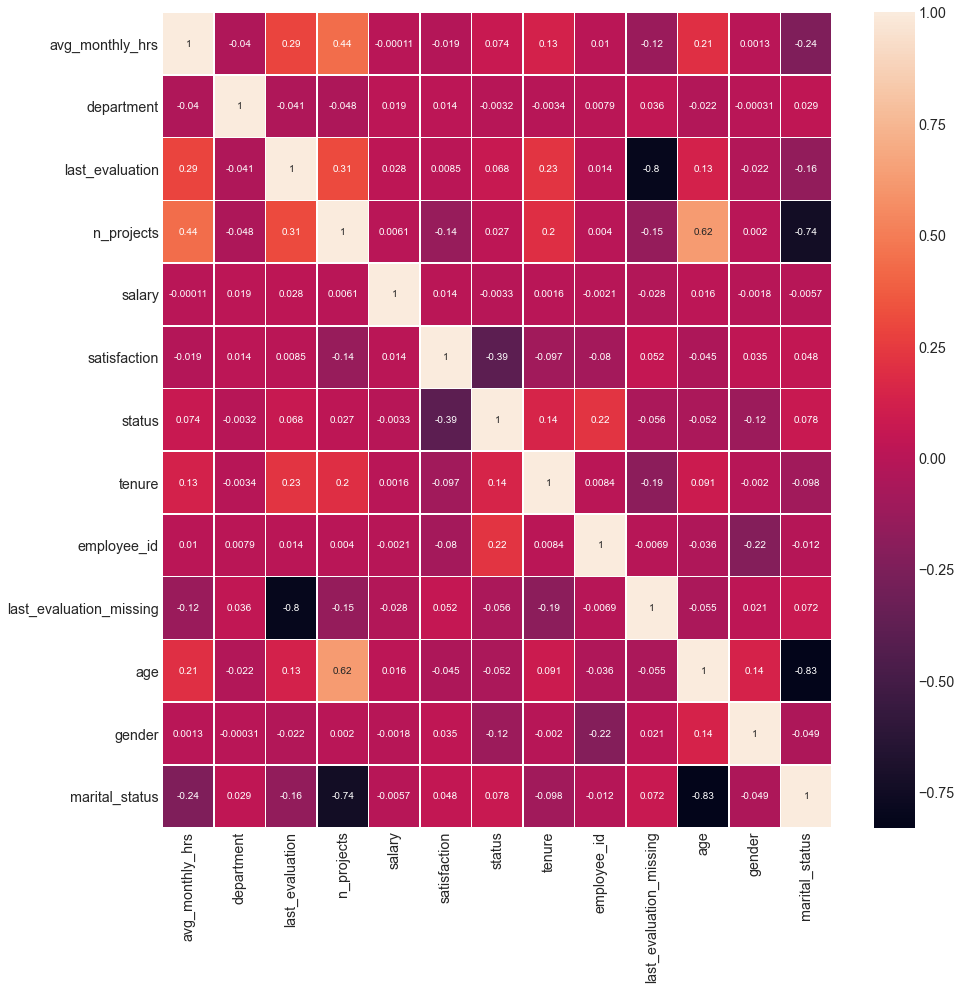

In [85]:
#sns.heatmap(df_final.corr(),annot=True)

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(df_final.corr(), annot=True, linewidths=.5, ax=ax)

In [86]:

# list of numerical variables
numerical_features = [feature for feature in df_final.columns if df_final[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_final[numerical_features].head()

Number of numerical variables:  13


,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,6,0.866838,6,2,0.134415,1,4.0,124467,0,42,0,0
1,134.0,6,0.555718,2,1,0.511041,1,3.0,112210,0,23,0,1
2,156.0,10,0.474082,2,2,0.405101,1,3.0,126150,0,24,0,1
3,256.0,9,0.961360,6,1,0.152974,1,4.0,125346,0,51,0,0
4,146.0,10,0.507349,2,2,0.434845,1,3.0,113707,0,23,0,1


In [87]:

discrete_feature=[feature for feature in numerical_features if len(df_final[feature].unique())<10 and feature not in ['Employee_Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 7


['n_projects',
 'salary',
 'status',
 'tenure',
 'last_evaluation_missing',
 'gender',
 'marital_status']

## Feature Selection

In [88]:
df_final.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'last_evaluation_missing', 'age', 'gender',
       'marital_status'],
      dtype='object')

In [89]:
df_final.drop('employee_id', axis=1, inplace=True)
df_final['filed_complaint'] = pd.to_numeric(df_final['filed_complaint'])
df_final['recently_promoted'] = pd.to_numeric(df_final['recently_promoted'])

In [90]:
X = df_final.drop(['status'], axis=1)
y= df_final['status']

In [91]:
y.value_counts()

0    10761
1    3355 
Name: status, dtype: int64

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_monthly_hrs          14116 non-null  float64
 1   department               14116 non-null  int64  
 2   filed_complaint          14116 non-null  float64
 3   last_evaluation          14116 non-null  float64
 4   n_projects               14116 non-null  int64  
 5   recently_promoted        14116 non-null  float64
 6   salary                   14116 non-null  int64  
 7   satisfaction             14116 non-null  float64
 8   tenure                   14116 non-null  float64
 9   last_evaluation_missing  14116 non-null  int64  
 10  age                      14116 non-null  int64  
 11  gender                   14116 non-null  int64  
 12  marital_status           14116 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.0 MB


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,21.292116,avg_monthly_hrs
1,3.737838,department
2,1.174826,filed_complaint
3,21.379097,last_evaluation
4,26.064283,n_projects
5,1.030348,recently_promoted
6,5.509651,salary
7,7.123315,satisfaction
8,7.244347,tenure
9,3.220349,last_evaluation_missing


In [94]:
X.filed_complaint.value_counts()

0.0    12075
1.0    2041 
Name: filed_complaint, dtype: int64

In [97]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(X.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # create a column of variable names
    vif["Features"] = X.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        X = X.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor                 Features
0  3.464592    department             
1  1.173636    filed_complaint        
2  1.029064    recently_promoted      
3  4.666911    salary                 
4  5.424759    satisfaction           
5  4.881441    tenure                 
6  1.147957    last_evaluation_missing
7  2.723812    gender                 
8  1.968054    marital_status         


In [98]:
X.shape

(14116, 9)

In [99]:
X.head()

,department,filed_complaint,recently_promoted,salary,satisfaction,tenure,last_evaluation_missing,gender,marital_status
0,6,0.0,0.0,2,0.134415,4.0,0,0,0
1,6,0.0,0.0,1,0.511041,3.0,0,0,1
2,10,1.0,0.0,2,0.405101,3.0,0,0,1
3,9,0.0,0.0,1,0.152974,4.0,0,0,0
4,10,0.0,0.0,2,0.434845,3.0,0,0,1


In [100]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [101]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [103]:
# Summarize original class distribution
print(Counter(y))

Counter({0: 10761, 1: 3355})


<b>Dataset is imbalanced, so we will use Balancing techniques </b>



In [104]:
# Transform the dataset
oversample = SMOTE(sampling_strategy=0.95)
X_new, y_new = oversample.fit_resample(X, y)

In [105]:
# Summarize the new class distribution
counter = Counter(y_new)
print(counter)

Counter({0: 10761, 1: 10222})


- The transformed dataset has a **balanced** distribution 

#### **Creating a ML Pipeline with SMOTE**

- Our pipeline will first perform **Oversampling** using **SMOTE** on the dataset, followed by a **Decision Tree Classifier**.

In [106]:
# Define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [107]:
# Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_new, y_new, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f' % np.mean(scores))

Accuracy: 0.905


- We get a **F1 score** of **90.7%** after performing **Oversampling using SMOTE**, and then classification using Decision Tree Classifier.

- The **results** might **vary slightly** every time this code is run, due to the **random nature** of the algorithm.

### Train test split

In [108]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=0)

In [109]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model
from sklearn.metrics import classification_report                   # To generate classification report of the model
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To perform train, test and split over the data
from sklearn.linear_model import LogisticRegression                 # To perform modeling using LogisticRegression
from sklearn.svm import SVC                                         # To perform modeling using SVC
from sklearn.tree import DecisionTreeClassifier                     # To perform modeling using DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.ensemble import VotingClassifier                       # To perform modeling using VotingClassifier
from sklearn.ensemble import BaggingClassifier                      # To perform modeling using BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier                     # To perform modeling using AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier             # To perform modeling using GradientBoostingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression                   # To use Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier                    # To use KNN Classifier
from sklearn.svm import SVC                                           # To use Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier                       # To use Decision Tree Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # To apply LDA
from sklearn.model_selection import GridSearchCV                      # To use GridSearchCV 
from sklearn.ensemble import RandomForestClassifier                   # to use Random Forest
#-----

In [110]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import StackingClassifier                     # To perform modeling using StackingClassifier

#import Xgboost

In [111]:


#!pip install libomp



In [112]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop variety of models such as: 

|Logistic Regression|Decision Tree|Random Forest|Bagging|Adaptive Boosting|Gradient Boosting|Voting Classifier|
|:--|:--|:--|:--|:--|:--|:--|

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

- Considering the complexity of data, we can run a **loop** over multiple **classifiers** and estimate the accuracy of the model.

- But in a real-life situation, one must train the model individually as then decide which model is best in which situation.

In [113]:
# Initialize classifiers
log_clf = LogisticRegression(random_state = 42, class_weight='balanced')
#sv_clf = SVC(random_state=42, class_weight='balanced', probability=True)
dt_clf = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
rf_clf = RandomForestClassifier(n_estimators=500, random_state = 42, class_weight='balanced', n_jobs=-1)
bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators=500, n_jobs=-1, random_state=42)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('dt', dt_clf)], voting='soft')

ada_clf = AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=42)
gb_clf = GradientBoostingClassifier(max_depth=20,n_estimators=300, random_state = 42)

In [114]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [115]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf,  dt_clf, bag_clf, voting_clf, rf_clf, ada_clf, gb_clf]

# Create an empty list to append scores and classifier name
train_scores = []
test_scores = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train, y_train)

  # Append train and test score to the empty list
  train_scores.append(np.round(a=clf.score(X_train, y_train), decimals=2))
  test_scores.append(np.round(a=clf.score(X_test, y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

Success!
CPU times: user 1min 12s, sys: 2.37 s, total: 1min 15s
Wall time: 1min 8s


In [116]:
# Create an accuracy dataframe from scores and names list
accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index=clf_names)

# View the accuracy of all the classifiers
accuracy_frame.transpose()

,LogisticRegression,DecisionTreeClassifier,BaggingClassifier,VotingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
Train Accuracy,0.77,1.00,1.00,1.00,1.00,1.00,1.00
Test Accuracy,0.78,0.90,0.93,0.92,0.93,0.92,0.92


**Observation:**



<a name = Section7></a>

---
# **7. Model Development & Evaluation**
---

- In this section we will develop stacking classifier with the help of different estimators such as:
  - Logistic Regression
  - Support Vector Classifier
  - K Nearest Neighbor Classifier
  - Random Forest Classifier
  - Gradient Boosting Classifier

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

In [117]:
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import f1_score

In [118]:
%%time
# Creating a collection of estimators
estimators = [#('logistic', LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)), 
              ('Gradient boosting', GradientBoostingClassifier(random_state=42)),
         ('Bagging Classifier', BaggingClassifier(random_state=42)),
           ('Decision Tree', DecisionTreeClassifier(random_state=0)),
            ('knn', KNeighborsClassifier(n_jobs=-1)),
              #  ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))]

level1 = LogisticRegression()
#level1=DecisionTreeClassifier(random_state=0)
#level1 = GradientBoostingClassifier(random_state=42)
#level1=RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=level1, 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)
y_pred_test =stack_clf.predict(X_test)
y_pred_train=stack_clf.predict(X_train)                                                 # make predictions on the testing set
#y_pred_test=np.exp(y_pred_test) 
#y_pred_train=np.exp(y_pred_train)
        #end = time.time()
        #timetaken.append(end - begin)
#test_accuracy.append(f1_score(y_test, y_pred))
#train_accuracy.append(f1_score(y_train,y_train_pred))
print('F1 score train', f1_score(y_train,y_pred_train, average='macro'))
print('F1 score test', f1_score(y_test,y_pred_test, average='macro'))
print('Classification',classification_report(y_train,y_pred_train))
print('Classification',classification_report(y_test,y_pred_test))
# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_test, y_test), decimals=2))

F1 score train 0.9750181682182577
F1 score test 0.9339910195702845
Classification               precision    recall  f1-score   support

           0       0.98      0.97      0.98      8047
           1       0.97      0.98      0.97      7690

    accuracy                           0.98     15737
   macro avg       0.97      0.98      0.98     15737
weighted avg       0.98      0.98      0.98     15737

Classification               precision    recall  f1-score   support

           0       0.94      0.93      0.94      2714
           1       0.93      0.94      0.93      2532

    accuracy                           0.93      5246
   macro avg       0.93      0.93      0.93      5246
weighted avg       0.93      0.93      0.93      5246

Accuracy on Train data: 0.98
Accuracy on Test data: 0.93
CPU times: user 5.56 s, sys: 360 ms, total: 5.92 s
Wall time: 4.83 s


**Observation:**

- We can **observe** that **results** obtained by stacking of models are **generalizing well** on test data.

- In the last notebook, we achieved **99% accuracy** on the **train set** and **68% accuracy** on the **test set**.

- Now we can see that **overfitting** is **under control** by using a stacked generalization. 